# Starter API Access Pipeline
---

## Imports

In [3]:
# Dependencies
# import datetime as dt
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint

import havoc_helper as havoc



In [4]:
fema_decl = pd.read_csv('Assets/CSVs/DisasterDeclarationsSummaries.csv', low_memory = False)
fema_decl.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,...,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
0,FM-5530-NV,5530,NV,FM,2024-08-12T00:00:00.000Z,2024,Fire,GOLD RANCH FIRE,0,0,...,99031,Washoe (County),24123,NaN,2024081201,9,R,2024-08-27T18:22:14.800Z,5d07e7c51bb300bfbec94a699a1e1ab1d61a97cd,f15a7a79-f1c3-41bb-8a5c-c05fbae34423
1,FM-5529-OR,5529,OR,FM,2024-08-09T00:00:00.000Z,2024,Fire,LEE FALLS FIRE,0,0,...,99067,Washington (County),24122,NaN,2024081001,10,R,2024-08-27T18:22:14.800Z,ae87cf3c6ed795015b714af7166c7c295b2b67c7,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
2,FM-5528-OR,5528,OR,FM,2024-08-06T00:00:00.000Z,2024,Fire,ELK LANE FIRE,0,0,...,99031,Jefferson (County),24116,NaN,2024080701,10,R,2024-08-27T18:22:14.800Z,432cf0995c47e3895cea696ede5621b810460501,59983f89-30bf-4888-b21b-62e8d57d9aac
3,FM-5527-OR,5527,OR,FM,2024-08-02T00:00:00.000Z,2024,Fire,MILE MARKER 132 FIRE,0,0,...,99017,Deschutes (County),24111,NaN,2024080301,10,R,2024-08-27T18:22:14.800Z,2f21d90cb6bc64b0d4121aa3f18d852bbb4b11fa,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
4,FM-5522-CA,5522,CA,FM,2024-07-27T00:00:00.000Z,2024,Fire,BOREL FIRE,0,0,...,99029,Kern (County),24102,NaN,2024072701,9,R,2024-08-27T18:22:14.800Z,51ec819011c936f387edf10b9d5839b35419ca95,9b73e19b-d326-4992-8da1-7e658d97607c


In [5]:
# Removing unwanted/unusable columns
fema_decl_clean = fema_decl[
    [
        'disasterNumber', 'declarationRequestNumber', 'declarationTitle', 'incidentType', 
        'declarationType', 'designatedArea', 'state', 'region', 'declarationDate', 
        'incidentBeginDate', 'tribalRequest', 'ihProgramDeclared', 'iaProgramDeclared', 
        'paProgramDeclared', 'hmProgramDeclared', 'id'
    ]
].copy()
fema_decl_clean['declarationDate'] = fema_decl_clean[
    'declarationDate'
    ].str.slice_replace(10)
fema_decl_clean['incidentBeginDate'] = fema_decl_clean[
    'incidentBeginDate'
    ].str.slice_replace(10)
display(fema_decl_clean)

,disasterNumber,declarationRequestNumber,declarationTitle,incidentType,declarationType,designatedArea,state,region,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,id
0,5530,24123,GOLD RANCH FIRE,Fire,FM,Washoe (County),NV,9,2024-08-12,2024-08-11,0,0,0,1,1,f15a7a79-f1c3-41bb-8a5c-c05fbae34423
1,5529,24122,LEE FALLS FIRE,Fire,FM,Washington (County),OR,10,2024-08-09,2024-08-08,0,0,0,1,1,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
2,5528,24116,ELK LANE FIRE,Fire,FM,Jefferson (County),OR,10,2024-08-06,2024-08-04,0,0,0,1,1,59983f89-30bf-4888-b21b-62e8d57d9aac
3,5527,24111,MILE MARKER 132 FIRE,Fire,FM,Deschutes (County),OR,10,2024-08-02,2024-08-02,0,0,0,1,1,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
4,5522,24102,BOREL FIRE,Fire,FM,Kern (County),CA,9,2024-07-27,2024-07-25,0,0,0,1,1,9b73e19b-d326-4992-8da1-7e658d97607c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67351,9,53010,FLOOD,Flood,DR,Statewide,TX,6,1953-06-19,1953-06-19,0,0,1,1,1,6ef68fa6-5889-466b-9e3b-ee4c06da0876
67352,8,53008,FLOOD,Flood,DR,Statewide,IA,7,1953-06-11,1953-06-11,0,0,1,1,1,f100b5c1-0f3f-4c3d-ad3c-50040e98ed8d
67353,7,53009,TORNADO,Tornado,DR,Statewide,MA,1,1953-06-11,1953-06-11,0,0,1,1,1,fca83efc-524a-45a0-ac98-2d43b954a5ea
67354,2,53003,TORNADO & HEAVY RAINFALL,Tornado,DR,Statewide,TX,6,1953-05-15,1953-05-15,0,0,1,1,1,ff821327-6b90-4246-b19f-fff8c4b288a8


In [6]:
# Unique FEMA Disaster Types
disaster_types = fema_decl_clean['incidentType'].unique()
pprint(disaster_types)

array(['Fire', 'Severe Storm', 'Straight-Line Winds', 'Flood',
       'Winter Storm', 'Hurricane', 'Tornado', 'Mud/Landslide',
       'Tropical Storm', 'Snowstorm', 'Earthquake', 'Coastal Storm',
       'Other', 'Severe Ice Storm', 'Biological', 'Dam/Levee Break',
       'Typhoon', 'Volcanic Eruption', 'Freezing', 'Toxic Substances',
       'Chemical', 'Terrorist', 'Drought', 'Human Cause',
       'Fishing Losses', 'Tsunami'], dtype=object)


In [7]:
# TODO -> Remove volcanoes, earthquake, mud/landslide
disaster_natural = pd.DataFrame(
    {
        'incidentType': [
            'Fire', 'Severe Storm', 'Straight-Line Winds', 
            'Flood', 'Winter Storm', 'Hurricane', 'Tornado',
            'Mud/Landslide', 'Tropical Storm', 'Snowstorm', 
            'Earthquake', 'Coastal Storm', 'Severe Ice Storm', 
            'Typhoon', 'Volcanic Eruption', 'Freezing', 
            'Drought', 'Tsunami'
        ]
    }
)

In [8]:
# Filter for just natural disaster types
fema_disasters = pd.merge(fema_decl_clean, disaster_natural, how = 'right', on = 'incidentType')

# TODO: Do we want renamed columns? Or do we like the current columns?
# fema_disasters = fema_disasters.rename(
#     columns = {
#         'disasterNumber': 'disaster_number', 'designatedArea': 'area',
#         'declarationRequestNumber': 'request_number', 'declarationTitle': 'title',
#         'incidentType': 'disaster_type'

#     }
# )
display(fema_disasters)

,disasterNumber,declarationRequestNumber,declarationTitle,incidentType,declarationType,designatedArea,state,region,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,id
0,5530,24123,GOLD RANCH FIRE,Fire,FM,Washoe (County),NV,9,2024-08-12,2024-08-11,0,0,0,1,1,f15a7a79-f1c3-41bb-8a5c-c05fbae34423
1,5529,24122,LEE FALLS FIRE,Fire,FM,Washington (County),OR,10,2024-08-09,2024-08-08,0,0,0,1,1,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
2,5528,24116,ELK LANE FIRE,Fire,FM,Jefferson (County),OR,10,2024-08-06,2024-08-04,0,0,0,1,1,59983f89-30bf-4888-b21b-62e8d57d9aac
3,5527,24111,MILE MARKER 132 FIRE,Fire,FM,Deschutes (County),OR,10,2024-08-02,2024-08-02,0,0,0,1,1,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
4,5522,24102,BOREL FIRE,Fire,FM,Kern (County),CA,9,2024-07-27,2024-07-25,0,0,0,1,1,9b73e19b-d326-4992-8da1-7e658d97607c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59096,1967,11042,TSUNAMI WAVES,Tsunami,DR,Honolulu (County),HI,9,2011-04-08,2011-03-11,0,0,0,1,1,9ce5ad8d-f0e1-4d12-9907-a704fe2f4511
59097,1967,11042,TSUNAMI WAVES,Tsunami,DR,Maui (County),HI,9,2011-04-08,2011-03-11,0,0,0,1,1,d64d8673-10bc-4799-809b-70317d714d68
59098,1964,11029,TSUNAMI WAVE SURGE,Tsunami,DR,Coos (County),OR,10,2011-03-25,2011-03-11,0,0,0,1,1,35f729e0-73ff-42aa-9b80-8bcc901be612
59099,1964,11029,TSUNAMI WAVE SURGE,Tsunami,DR,Curry (County),OR,10,2011-03-25,2011-03-11,0,0,0,1,1,89c45999-d563-423f-a2dd-e69b96103b55


In [9]:
# Counts of declaration types 
# DR = Major Disasters, EM = Emergency Declaratation, FM = Fire Management)
# For more info see README (in progress)
fema_disasters['declarationType'].value_counts()

declarationType
DR    41116
EM    15991
FM     1994
Name: count, dtype: int64

In [10]:
# Counts of natural disaster types
fema_disasters['incidentType'].value_counts()

incidentType
Severe Storm           18399
Hurricane              13721
Flood                  11093
Fire                    3759
Snowstorm               3707
Severe Ice Storm        2942
Tornado                 1623
Drought                 1292
Tropical Storm          1047
Coastal Storm            637
Freezing                 301
Earthquake               228
Typhoon                  130
Winter Storm             117
Volcanic Eruption         51
Mud/Landslide             43
Tsunami                    9
Straight-Line Winds        2
Name: count, dtype: int64

In [11]:
# Validating no NaNs
fema_disasters.count()

disasterNumber              59101
declarationRequestNumber    59101
declarationTitle            59101
incidentType                59101
declarationType             59101
designatedArea              59101
state                       59101
region                      59101
declarationDate             59101
incidentBeginDate           59101
tribalRequest               59101
ihProgramDeclared           59101
iaProgramDeclared           59101
paProgramDeclared           59101
hmProgramDeclared           59101
id                          59101
dtype: int64

In [12]:
# Filter: Natural disasters per State
fema_disasters['state'].value_counts()

state
TX    4779
FL    2635
KY    2554
MO    2534
LA    2398
GA    2333
VA    2308
OK    2305
NC    2110
PR    1947
MS    1777
IA    1719
KS    1607
AL    1603
CA    1557
TN    1532
AR    1472
MN    1406
NE    1336
ND    1280
IN    1279
NY    1278
SD    1181
WV    1148
PA    1118
IL    1109
OH    1102
SC    1039
WA     902
WI     725
MI     595
NJ     556
OR     536
CO     531
MT     507
ME     426
MD     399
NM     380
VT     377
MA     365
NH     300
ID     276
AZ     271
CT     245
AK     211
NV     198
UT     183
RI     106
HI      97
WY      86
VI      79
MP      67
AS      66
MH      53
DE      47
FM      31
GU      20
DC      19
PW       1
Name: count, dtype: int64

In [13]:
# Filter: Natural disasters per hit area
fema_disasters['designatedArea'].value_counts()

designatedArea
Washington (County)                          510
Jefferson (County)                           462
Statewide                                    450
Jackson (County)                             450
Franklin (County)                            441
                                            ... 
Southern Ute Indian Reservation                1
Ute Mountain Indian Reservation (Also NM)      1
Nondalton (ANV/ANVSA)                          1
Salt River Pima-Maricopa Indian Community      1
Namorik (County-equivalent)                    1
Name: count, Length: 2201, dtype: int64

## Cleaning Area Data for Geocoding

In [14]:
fema_disasters.head(10)

,disasterNumber,declarationRequestNumber,declarationTitle,incidentType,declarationType,designatedArea,state,region,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,id
0,5530,24123,GOLD RANCH FIRE,Fire,FM,Washoe (County),NV,9,2024-08-12,2024-08-11,0,0,0,1,1,f15a7a79-f1c3-41bb-8a5c-c05fbae34423
1,5529,24122,LEE FALLS FIRE,Fire,FM,Washington (County),OR,10,2024-08-09,2024-08-08,0,0,0,1,1,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
2,5528,24116,ELK LANE FIRE,Fire,FM,Jefferson (County),OR,10,2024-08-06,2024-08-04,0,0,0,1,1,59983f89-30bf-4888-b21b-62e8d57d9aac
3,5527,24111,MILE MARKER 132 FIRE,Fire,FM,Deschutes (County),OR,10,2024-08-02,2024-08-02,0,0,0,1,1,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
4,5522,24102,BOREL FIRE,Fire,FM,Kern (County),CA,9,2024-07-27,2024-07-25,0,0,0,1,1,9b73e19b-d326-4992-8da1-7e658d97607c
5,5521,24098,RETREAT FIRE,Fire,FM,Yakima (County),WA,10,2024-07-26,2024-07-23,0,0,0,1,1,bc02a243-2458-4af3-84e3-b9928bd1d41d
6,5520,24099,GWEN FIRE,Fire,FM,Nez Perce Indian Reservation,ID,10,2024-07-26,2024-07-25,0,0,0,1,1,85cccdec-5e22-436f-a3e7-acd7340172cf
7,5520,24099,GWEN FIRE,Fire,FM,Latah (County),ID,10,2024-07-26,2024-07-25,0,0,0,1,1,d0e4282c-5d39-4af2-814c-2192d748f16c
8,5520,24099,GWEN FIRE,Fire,FM,Nez Perce (County),ID,10,2024-07-26,2024-07-25,0,0,0,1,1,b058f371-8e3e-49dc-bb08-aac48229a85f
9,5519,24097,PARK FIRE,Fire,FM,Butte (County),CA,9,2024-07-25,2024-07-24,0,0,0,1,1,00045754-7992-448a-a8ae-181fb748a576


In [15]:
# Splitting up area from the areaType in designatedArea
geocode_df = fema_disasters[['designatedArea', 'state', 'id']].copy()
geocode_df[['area', 'areaType']] = geocode_df['designatedArea'].str.split('(', n = 1, expand = True)
geocode_df = geocode_df.drop(axis = 0, columns = 'designatedArea')
areas = geocode_df.pop('area')
areaTypes = geocode_df.pop('areaType')
areaTypes = '(' + areaTypes
geocode_df.insert(0, 'area', areas)
geocode_df.insert(1, 'areaType', areaTypes)

In [16]:
# Regex for cleaning up text in areaType
geocode_df['areaType'] = geocode_df['areaType'].str.extract(r'\(([^)]+)\)')
geocode_df['areaType'] = geocode_df['areaType'].str.replace(r'\b(of|Also|and)\b', '', regex = True).str.strip()
display(geocode_df)

,area,areaType,state,id
0,Washoe,County,NV,f15a7a79-f1c3-41bb-8a5c-c05fbae34423
1,Washington,County,OR,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
2,Jefferson,County,OR,59983f89-30bf-4888-b21b-62e8d57d9aac
3,Deschutes,County,OR,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
4,Kern,County,CA,9b73e19b-d326-4992-8da1-7e658d97607c
...,...,...,...,...
59096,Honolulu,County,HI,9ce5ad8d-f0e1-4d12-9907-a704fe2f4511
59097,Maui,County,HI,d64d8673-10bc-4799-809b-70317d714d68
59098,Coos,County,OR,35f729e0-73ff-42aa-9b80-8bcc901be612
59099,Curry,County,OR,89c45999-d563-423f-a2dd-e69b96103b55


In [17]:
geocode_df['areaType'].unique()

array(['County', nan, 'Parish', 'Borough', 'Census Area',
       'Indian Reservation', 'Municipio', 'ANV/ANVSA', 'NM',
       'County-equivalent', 'OTSA', 'NM  UT', 'Sisseton', 'Reservation',
       'District', 'Island', 'AZ  UT', 'Township',
       'Unorganized Territory', 'Police Jury Ward', 'Nett Lake', 'TDSA',
       'KS', 'Municipality', 'CCD', 'City  Borough',
       'Native Regional Corporation', 'State', 'Census Subarea'],
      dtype=object)

In [18]:
# Setting up the Data Frame containing Area Types with 1
# or more states instead of classic 'County' or 'Reservation'
# --> Result is duplicated incidents but for the additional states

# Multi-state regex location in 'areaType' column
multiState_regex = r'\b[A-Z]{2}(?:\s[A-Z]{2})*\b'
states_to_split = geocode_df['areaType'].str.contains(multiState_regex, na = False)
new_rows = []

# Iterate through just the Area Types that need to be split and duplicated
for index, row in geocode_df[states_to_split].iterrows():
    states = row['areaType'].split()
    for state in states:
        new_row = row.copy()
        new_row['state'] = state
        new_rows.append(new_row)

geocode_df = pd.concat(     # Concatenate duplicated rows for multiple states to the main dataframe
    [geocode_df, pd.DataFrame(new_rows)], ignore_index = True
    ).reset_index(drop = True).copy()

In [19]:
# Set Non-Capture Regex and location rows that can have areaType set to 'Reservation'
reservation_regex = r'(?:Indian)|(?:Reservation)|(?:Tribe)|(?:Trust Lands)|(?:TDSA)'
reservation_loc = geocode_df['area'].str.contains(reservation_regex, case = False, regex = True)
geocode_df.loc[reservation_loc, 'areaType'] = 'Native Land'

In [20]:
# Nitty-Gritty edits (less than 1000 rows each)
# Null `areaTypes`: Crow/Northern Cheyenne Area
#-----------------------------------------------
state_dict = {
    'AK': 'Alaska', 'AL': 'Alabama', 'AR': 'Arkansas', 'AS': 'American Samoa', 'AZ': 'Arizona', 
    'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DC': 'District of Columbia', 
    'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'GU': 'Guam', 'HI': 'Hawaii', 'IA': 'Iowa', 
    'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 
    'MA': 'Massachusetts', 'MD': 'Maryland', 'ME': 'Maine', 'MI': 'Michigan', 'MN': 'Minnesota', 
    'MO': 'Missouri', 'MP': 'Northern Mariana Islands', 'MS': 'Mississippi', 'MT': 'Montana', 
    'NC': 'North Carolina', 'ND': 'North Dakota', 'NE': 'Nebraska', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 
    'NM': 'New Mexico', 'NV': 'Nevada', 'NY': 'New York', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 
    'PA': 'Pennsylvania', 'PR': 'Puerto Rico', 'RI': 'Rhode Island', 'SC': 'South Carolina', 
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VA': 'Virginia', 
    'VI': 'U.S. Virgin Islands', 'VT': 'Vermont', 'WA': 'Washington', 'WI': 'Wisconsin', 
    'WV': 'West Virginia', 'WY': 'Wyoming'
}

# Found under Null types (NaN)
# Location Statewide listed areas, copying abbreviations from `state` column
# to the `area` column, extending them to full length names and then setting 
# the `areaType` to State
statewide_locs = (geocode_df['area'] == 'Statewide')    # Bool location
geocode_df.loc[statewide_locs, 'areaType'] = 'State'    # Set type to State
geocode_df.loc[statewide_locs, 'area'] = geocode_df.loc[statewide_locs, 'state']    # Copy State value to area
geocode_df['area'] = geocode_df['area'].replace(state_dict)   # Transform abbr states to Full name

# Using geocode_df['areaType'].unique() location type 'City  Borough'
# Only 1 entry of Wranell, AK (Alaska) -> Correct to 'Borough'
geocode_df.loc[geocode_df['areaType'] == 'City  Borough', 'areaType'] = 'Borough'

# Regional Educational Attendance Area `area` with Null `areaType` (it's the same with or without null spec)
reaa_regex = r'Regional Educational.*$'
reaa_loc = geocode_df['area'].str.contains(reaa_regex, case = False, regex = True)
geocode_df.loc[reaa_loc, 'areaType'] = 'County'
geocode_df.loc[reaa_loc, 'area'] = geocode_df.loc[reaa_loc, 'area'].str.replace(reaa_regex, '', regex = True)

In [21]:
# Organizing `areaType` into bins for granularity
areaType_bins = {
    'State': ['State', 'Territory', 'Unorganized Territory', 'Island'],
    'County': ['County', 'County-equivalent', 'Parish', 'Borough', 'Census Area'],
    'City': ['City', 'Township', 'Municipality', 'Municipio', 'Census Subarea', 'CCD'],
    'Native Land': ['Native Land', 'Reservation', 'Indian Reservation', 'ANV/ANVSA', 'OTSA', 'TDSA', 'Native Regional Corporation', 'Nett Lake'],
    'Other': ['Other', 'District', 'Police Jury Ward', 'Sisseton']
}

# Converting bins into reverse-lookup for mapping
# (Treats dictionary created with list-comprehension)
areaType_map = {
    old_type: new_type  # Specifying key:value pair setup
    for new_type, old_types in areaType_bins.items()    # Outer-iteration of type_key -> [type_val1, type_val2, ...]
    for old_type in old_types   # Inner-iteration of type in [type1, type2, type3, ...]
}

# Set mapping to DataFrame for corrections
geocode_df['areaType'] = geocode_df['areaType'].map(areaType_map, na_action = 'ignore')

### `areaType` DATA CORRECTION USING CSV FILE
---

In [22]:
# # Setting up null `areaType` DataFrame
# update_loc = geocode_df['areaType'].isnull()
# geocode_df.loc[update_loc, 'area'] = geocode_df.loc[update_loc, 'area'].astype(str).str.strip().str.title()

# # Reading in CSV File for City, County, and State information to correct FEMA area data
# place_df = pd.read_csv('Assets/CSVs/us_cities_states_counties.csv', delimiter = '|')
# place_df = place_df.drop(axis = 0, columns = 'State short')
# place_df = place_df.rename(
#     columns = {
#         'State full': 'State'
#     }
# )
# place_df = place_df[['State', 'City', 'City alias']]

# # Melting place_df for use as a lookup-table in merge with geocode_df
# place_key = pd.melt(place_df, var_name = 'areaType', value_name = 'area'
#                     ).drop_duplicates(
#                     ).reset_index(drop = True)
# place_key['area'] = place_key['area'].astype(str).str.strip()
# place_key.loc[place_key['areaType'] == 'City alias', 'areaType'] = 'City'

# # Merging with areaType null location of geocode_df
# update_df = geocode_df.loc[update_loc].merge(place_key, how = 'left', on = 'area')
# geocode_df.loc[update_loc, 'areaType'] = update_df['areaType_y']
# geocode_df.loc[geocode_df['areaType'].isnull()]

geocode_df = geocode_df.dropna()
geocode_df.drop(axis = 0, columns = 'id')

,area,areaType,state
0,Washoe,County,NV
1,Washington,County,OR
2,Jefferson,County,OR
3,Deschutes,County,OR
4,Kern,County,CA
...,...,...,...
59122,Navajo Nation Reservation,Native Land,UT
59123,Navajo Nation Reservation,Native Land,AZ
59124,Navajo Nation Reservation,Native Land,UT
59125,Navajo Nation Reservation,Native Land,NM


In [23]:
# geoapify_base = 'https://api.geoapify.com/v1/geocode/search?'
# geoapify_params = {
#     'apiKey': api_keys.geoapify_key
#     }
# coordinates = []

# for index, row in geocode_df.iterrows():
#     geoapify_params['text'] = f'{row['area']}, {row['state']}'
#     try:
#         geo_response = requests.get(geoapify_base, geoapify_params).json()
#     except:
#         print('Could not find location')

#     lat = geo_response['features'][0]['geometry']['coordinates'][0]
#     lng = geo_response['features'][0]['geometry']['coordinates'][1]
#     coordinates.append((lat, lng))
#     break

SyntaxError: f-string: unmatched '[' (2588903561.py, line 8)

In [ ]:
# geocode_df = pd.Series(coordinates)

NameError: name 'coordinates' is not defined

In [25]:
fema_disasters.head()


,disasterNumber,declarationRequestNumber,declarationTitle,incidentType,declarationType,designatedArea,state,region,declarationDate,incidentBeginDate,tribalRequest,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,id
0,5530,24123,GOLD RANCH FIRE,Fire,FM,Washoe (County),NV,9,2024-08-12,2024-08-11,0,0,0,1,1,f15a7a79-f1c3-41bb-8a5c-c05fbae34423
1,5529,24122,LEE FALLS FIRE,Fire,FM,Washington (County),OR,10,2024-08-09,2024-08-08,0,0,0,1,1,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
2,5528,24116,ELK LANE FIRE,Fire,FM,Jefferson (County),OR,10,2024-08-06,2024-08-04,0,0,0,1,1,59983f89-30bf-4888-b21b-62e8d57d9aac
3,5527,24111,MILE MARKER 132 FIRE,Fire,FM,Deschutes (County),OR,10,2024-08-02,2024-08-02,0,0,0,1,1,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
4,5522,24102,BOREL FIRE,Fire,FM,Kern (County),CA,9,2024-07-27,2024-07-25,0,0,0,1,1,9b73e19b-d326-4992-8da1-7e658d97607c


In [29]:
# Convert dates to datetime
fema_disasters['declarationDate'] = pd.to_datetime(fema_disasters['declarationDate'])
fema_disasters['incidentBeginDate'] = pd.to_datetime(fema_disasters['incidentBeginDate'])

# Calculate time to declare
fema_disasters['time_to_declare'] = (fema_disasters['declarationDate'] - fema_disasters['incidentBeginDate']).dt.days

# # Summary statistics for time_to_declare
fema_disasters['time_to_declare'].describe()




count    59101.000000
mean        20.606504
std         30.451559
min       -266.000000
25%          1.000000
50%          8.000000
75%         31.000000
max       2671.000000
Name: time_to_declare, dtype: float64


In [32]:
program_cols = ['ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared']
fema_disasters[program_cols].sum()


ihProgramDeclared     7319
iaProgramDeclared    17130
paProgramDeclared    54881
hmProgramDeclared    25727
dtype: int64

In [33]:
fema_disasters['total_programs'] = fema_disasters[program_cols].sum(axis = 1)

In [36]:
#correlation matrix
program_cols = ['ihProgramDeclared', 'iaProgramDeclared', 'paProgramDeclared', 'hmProgramDeclared']
program_cols


['ihProgramDeclared',
 'iaProgramDeclared',
 'paProgramDeclared',
 'hmProgramDeclared']

In [38]:
#corelation matrix
fema_disasters[program_cols].corr()

,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared
ihProgramDeclared,1.000000,0.152468,-0.180415,0.420325
iaProgramDeclared,0.152468,1.000000,-0.301962,-0.196388
paProgramDeclared,-0.180415,-0.301962,1.000000,-0.043738
hmProgramDeclared,0.420325,-0.196388,-0.043738,1.000000


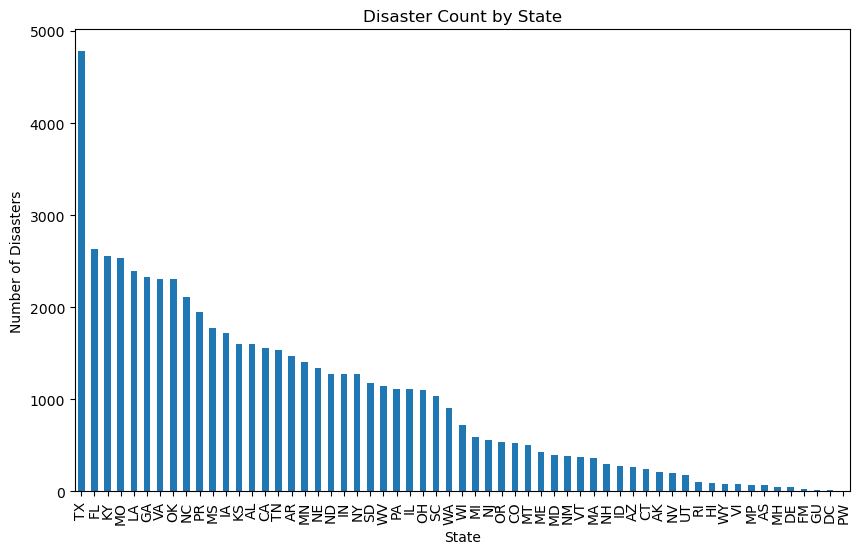

In [39]:
import matplotlib.pyplot as plt

state_disaster_count = fema_disasters['state'].value_counts()

# Plot
state_disaster_count.plot(kind='bar', figsize=(10, 6), title="Disaster Count by State")
plt.xlabel("State")
plt.ylabel("Number of Disasters")
plt.show()


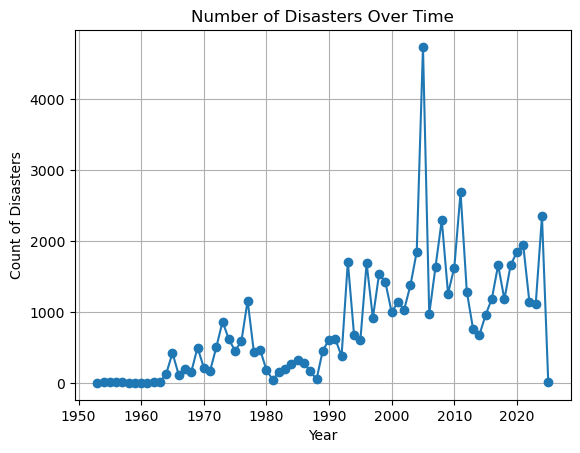

In [40]:
# Extract year from declarationDate
fema_disasters['declarationYear'] = fema_disasters['declarationDate'].dt.year

# Count disasters by year
yearly_disasters = fema_disasters['declarationYear'].value_counts().sort_index()

# Plot trends over time
plt.plot(yearly_disasters.index, yearly_disasters.values, marker='o')
plt.title("Number of Disasters Over Time")
plt.xlabel("Year")
plt.ylabel("Count of Disasters")
plt.grid()
plt.show()


In [49]:
# Group data by year and count the number of disasters
yearly_disasters = fema_disasters['declarationYear'].value_counts().sort_index()

# Calculate percentage change year-over-year
yearly_disasters_percentage_change = yearly_disasters.pct_change() * 100  # Convert to percentage

# Combine the counts and percentage change into a single DataFrame for better visualization
yearly_disasters_summary = pd.DataFrame({
    'Disaster Count': yearly_disasters,
    'Percentage Change (%)': yearly_disasters_percentage_change
})

# Display the summary
yearly_disasters_summary


,Disaster Count,Percentage Change (%)
declarationYear,,
1953,12,NaN
1954,16,33.333333
1955,17,6.250000
1956,15,-11.764706
1957,15,0.000000
...,...,...
2021,1952,5.513514
2022,1139,-41.649590
2023,1113,-2.282704


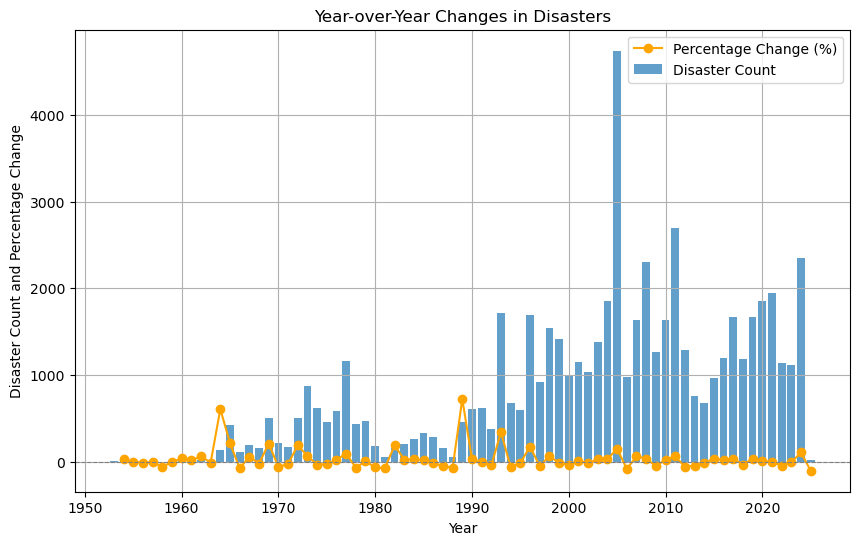

In [50]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(yearly_disasters.index, yearly_disasters.values, alpha=0.7, label="Disaster Count")
plt.plot(yearly_disasters.index, yearly_disasters_percentage_change, marker='o', color='orange', label="Percentage Change (%)")
plt.title("Year-over-Year Changes in Disasters")
plt.xlabel("Year")
plt.ylabel("Disaster Count and Percentage Change")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid()
plt.show()


In [51]:
# Find the year with the largest percentage change
max_change_year = yearly_disasters_summary['Percentage Change (%)'].idxmax()
max_change_value = yearly_disasters_summary['Percentage Change (%)'].max()

# Calculate the average percentage change (excluding the first NaN value)
average_change = yearly_disasters_summary['Percentage Change (%)'].mean()

# Print results
print(f"Year with the largest percentage change: {max_change_year} ({max_change_value:.2f}%)")
print(f"Average percentage change: {average_change:.2f}%")

Year with the largest percentage change: 1989 (726.79%)
Average percentage change: 38.99%


Above we can see that Natuarl Disasters declared by FEMA over time has significatnly increased 

In [42]:
time_by_state = fema_disasters.groupby('state')['time_to_declare'].mean().sort_values()
time_by_state




state
PR     8.079610
FL     8.321442
NC     9.111848
AS     9.151515
LA     9.155129
GA     9.451350
AL     9.950717
VI    10.708861
MP    10.865672
SC    11.225217
GU    13.650000
TX    14.653065
MS    15.326393
PA    15.555456
CO    15.920904
NJ    16.088129
WV    16.385017
MI    16.563025
VA    16.685009
AR    17.956522
PW    18.000000
CA    18.152216
NV    18.404040
OK    20.227766
OH    20.292196
TN    20.315927
OR    21.104478
AZ    21.605166
WI    21.689655
DE    21.936170
MD    22.691729
NM    23.228947
MO    23.415943
MA    25.427397
KY    25.442835
RI    25.518868
CT    25.534694
IL    26.342651
WY    26.523256
IN    26.847537
IA    26.951134
NY    28.523474
ID    28.692029
NH    28.973333
MN    30.507112
VT    30.885942
FM    32.129032
WA    33.124169
NE    33.372006
UT    33.535519
ME    33.612676
DC    37.473684
KS    38.439328
MT    42.913215
HI    43.340206
MH    43.641509
ND    45.681250
SD    49.823031
AK    52.635071
Name: time_to_declare, dtype: float64

In [43]:
time_by_incident = fema_disasters.groupby('incidentType')['time_to_declare'].mean().sort_values()
time_by_incident


incidentType
Drought                 2.835139
Hurricane               7.505211
Coastal Storm           9.048666
Tornado                 9.349969
Tropical Storm         10.449857
Typhoon                13.969231
Earthquake             14.837719
Fire                   15.308061
Severe Ice Storm       17.144120
Flood                  24.896241
Snowstorm              25.101699
Tsunami                26.666667
Straight-Line Winds    30.000000
Severe Storm           31.016305
Freezing               40.498339
Volcanic Eruption      53.705882
Mud/Landslide          65.255814
Winter Storm           70.367521
Name: time_to_declare, dtype: float64

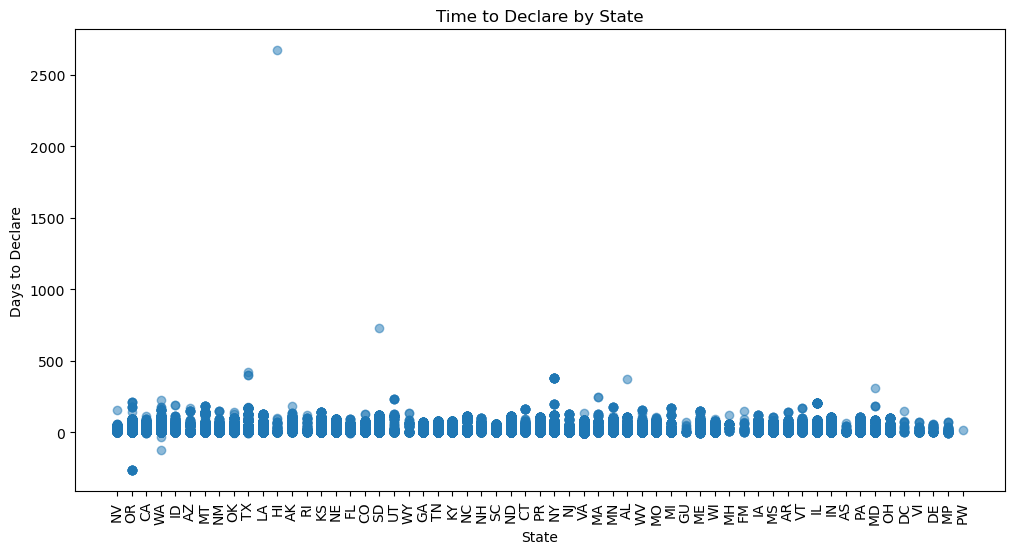

In [45]:
plt.figure(figsize=(12, 6))
plt.scatter(fema_disasters['state'], fema_disasters['time_to_declare'], alpha=0.5)
plt.title("Time to Declare by State")
plt.xlabel("State")
plt.ylabel("Days to Declare")
plt.xticks(rotation=90)
plt.show()

